# Планирование продуктовой линейки и рекламных акций в интернет-магазине компьютерных игр

# Описание проекта

Интернет-магазин занимается продажей компьютерных игр по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Заказчиком предоставлены данные до 2016 года. Необходимо представить гипотетическую ситуацию, что сейчас декабрь 2016 г., и мы  планируем кампанию на 2017-й год. Нужно отработать общий принцип работы с данными, и неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цель проекта  

Выявить закономерности, определяющие коммерческую успешность игр.

# Описание данных

*Датасет games.csv:*

**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB ([ознакомиться подробнее можно здесь](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board))

*Примечание:* Данные за 2016 год могут быть неполными.

# Содержание  

1 Открытие файла и изучение общей информации  
1.1 Вывод  
2 Предобработка данных  
2.1 Замена названий столбцов  
2.2 Обработка пропусков  
2.3 Преобразование данных в нужные типы  
2.4 Расчет суммарных продаж  
2.5 Вывод  
3 Исследовательский анализ даных  
3.1 Выпуск игр по годам  
3.2 Изменение продаж по платформам  
3.3 Определение актуального периода для построения прогнозов  
3.4 Выбор потенциально прибыльных платформ  
3.5 Построение диаграммы размаха на основе глобальных продаж игр, в разбивке по платформам  
3.6 Влияние отзывов критиков и пользователей на продажи внутри популярной платформы (PS4)  
3.7 Соотнесение выводов о корреляции отзывов с продажами на других платформах  
3.8 Распределение игр по жанрам  
3.9 Вывод  
4 Составление портрета пользователя каждого региона (NA, EU, JP)  
4.1 Самые популярные платформы (топ-5) для пользователя каждого региона  
4.2 Самые популярные жанры (топ-5) для пользователя каждого региона  
4.3 Влияние рейтинга ESRB на продажи в отдельном регионе  
4.4 Вывод  
5 Проверка гипотез  
6 Общий вывод  

## 1 Открытие файла и изучение общей информации

Для начала загрузим библиотеки, которые понадобятся для работы над проектом:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

Теперь прочитаем файл с данными и сохраним его для дальнейшей работы в отдельной переменной df:

In [2]:
df = pd.read_csv('/datasets/games.csv')

Для ознакомления с данными, выведем первые 15 строк датафрейма, общую информацию о нем, а также воспользуемся методом `describe()` для знакомства с числовыми значениями:

In [3]:
display(df.head(15))
display(df.tail(15))
df.info()
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


*Выявлены следующее проблемы в данных:*  
1. Названия столбцов таблицы содержат буквы верхнего регистра.
2. В столбце **Year_of_Release** год выпуска представлен типом float64. 
3. Столбцы **Critic_Score**, **User_Score** и **Rating**, содержат пропуски.
4. В столбце **Critic_Score** целочисленные значения рейтинга представлены типом float64.
5. В столбце **User_Score** вещественные числа представлены типом object, кроме того, присутствуют аномальные значения - `tbd`.

**Вывод:**

На этапе обзора данных обнаружено нарушение стиля в наименованиях столбцов, использование неподходящих типов данных, пропуски в даннных, а также, аномальные значения `tbd`, что в переводе с английского означает "подлежит определению", т.е. по сути являются аналогами пропущенных значений. Для дальнейшей работы над проектом необходимо устранить перечисленные выше проблемы в данных.

## 2 Предобработка данных

### 2.1 Замена названий столбцов.

Начнем предобработку данных с исправления стиля и переименуем названия столбцов с использованием только строчных букв:

In [4]:
df.columns = map(str.lower, df.columns)  # приводим названия столбцов к нижнему регистру
df.columns  # контролируем результат

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод**

Правила стиля при именовании столбцов теперь соблюдены, переходим к следующему подразделу.

### 2.2 Обработка пропусков

Уточним информацию по количеству пропусков по столбцам, а также долю пропущенных значений по отношению ко всему датафрейму:

In [5]:
print(df.isna().sum())  # выводим кол-во пропусков по столбцам
df.isna().mean().sort_values(ascending=False)  # выводим соотношение

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

В столбце **name** мы видим всего два пропуска, этот параметр в базе данных один из основных, поэтому вероятнее всего, произошло случайное дублирование и последующее удаление карточки товара. Процент этих пропусков ничтожно мал, и без наименования эти данные не имеют особого смысла, поэтому их можно смело удалить методом `dropna()`.

В столбце **year_of_release** 269 пропусков. Ошибки могли возникнуть также из-за небрежности при заполнении данных. Параметр важный, определенно влияющий на планирование продаж и рекламных акций, и использование каких-либо аналогий может привести к искажению картины. К тому же, доля пропущенных значений находится на уровне 1,6 %, поэтому также удалим их методом `dropna()`.  

В столбце **genre** есть 2 пропуска, возможно жанр игры был смешанным. Проверим названия и определимся, что с ними делать дальше:

In [6]:
df.loc[(df['genre'].isnull())]  # выводим срез с пропусками

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Наименования также отсутствуют, поэтому дополнительно обрабатывать столбец **genre** не придется, эти строки будут удалены при обработке столбца **name**.

Больше всего пропусков (~ 40-51% данных) встречается в столбцах **critic_score**, **user_score** и **rating**. Обращая внимание на первые и последние строки датафрейма, видно, что чаще всего пропуски встречаются одновременно в трех колонках. Возможно, что в системе не предусмотрено обязательное заполнение данных полей, или датафрейм формировался из разных источников. Очевидно, что эти данные составляют значительный объем и его удалять нельзя. Поэтому поставим заглушку, т.е. для значений с числами в столбцах **critic_score** и **user_score** проведем замену `NaN` на -1, а в столбце **rating** пропуски заменим на "no_rating", используя метод `fillna()`.  

Аномальные значения `tbd` из столбца **user_score** заменим, как и пропуски, на -1, но уже используя метод `DataFrame.loc`:

**Обрабатываем столбец name**

In [7]:
print('Пропуски до:', df['name'].isna().sum())  # выводим количество пропусков до обработки
df.dropna(subset=['name'], inplace=True)  # удаляем строки с пропущенными значениями
print('Пропуски после:', df['name'].isna().sum())  # контролируем результат

Пропуски до: 2
Пропуски после: 0


**Обрабатываем столбец year_of_release**

In [8]:
print('Пропуски до:', df['year_of_release'].isna().sum())  # выводим количество пропусков до обработки
df.dropna(subset=['year_of_release'], inplace=True)  # удаляем строки с пропущенными значениями
print('Пропуски после:', df['year_of_release'].isna().sum())  # контролируем результат

Пропуски до: 269
Пропуски после: 0


**Обрабатываем столбец critic_score**

In [9]:
print('Пропуски до:', df['critic_score'].isna().sum())  # выводим количество пропусков до обработки
df['critic_score'] = df['critic_score'].fillna(-1)  # проводим замену пропусков
print('Пропуски после:', df['critic_score'].isna().sum())  # контролируем результат

Пропуски до: 8461
Пропуски после: 0


**Обрабатываем столбец user_score**

In [10]:
print('Пропуски до:', df['user_score'].isna().sum())  # выводим количество пропусков до обработки
df['user_score'] = df['user_score'].fillna(-1)  # проводим замену пропусков
print('Пропуски после:', df['user_score'].isna().sum())  # контролируем результат

Пропуски до: 6605
Пропуски после: 0


**Обрабатываем столбец rating**

In [11]:
print('Пропуски до:', df['rating'].isna().sum())  # выводим количество пропусков до обработки
df['rating'] = df['rating'].fillna('no_rating')  # проводим замену пропусков
print('Пропуски после:', df['rating'].isna().sum())  # контролируем результат

Пропуски до: 6676
Пропуски после: 0


Проверим результат проведенной работы выводом общего списка пропущенных значений:

In [12]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Замена аномальных значений "tbd"**

In [13]:
df.loc[df['user_score'] == 'tbd','user_score'] = (-1)

Теперь можно снова вывести 15 последних строк и оценить изменения после обработки:

In [14]:
df.tail(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,-1.0,-1,no_rating
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,-1.0,-1,no_rating
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,-1.0,-1,no_rating
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,-1.0,-1,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,no_rating
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,-1.0,-1,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,-1.0,-1,no_rating
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,-1.0,-1,no_rating
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,-1.0,-1,no_rating


Запланированная обработка пропусков прошла успешно, проверим, есть ли дубликаты:

In [15]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Дубликатов нет, переходим к следующему подразделу. 

### 2.3 Преобразование данных в нужные типы

Поскольку данные уже прошли первичную обработку, для изменения типа будем использовать метод `astype()`, не опасаясь возникновения ошибок. Год выпуска релиза приведем к целочисленному значению:

In [16]:
df['year_of_release'] = df['year_of_release'].astype('int')

Рейтинг критиков состоит из целочисленных значений, преобразуем его в соответствующий тип:

In [17]:
df['critic_score'] = df['critic_score'].astype('int')

Рейтинг зрителей содержит вещественные числа, поэтому он должен быть представлен типом float64.

Проверим преобазования, выведем первые 5 строк датафрейма и общую информацию:

In [18]:
display(df.head())
df['user_score'] = df['user_score'].astype('float')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,no_rating


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


Преобразование данных к нужному типу прошло успешно, можем приступать к следующему подразделу.

### 2.4 Расчет суммарных продаж

Рассчитаем суммарные продажи по всем регионам и запишем полученные данные в новый столбец **sales_quantity**:

In [20]:
#df['sales_quantity'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']  # первоначальная версия

df['sales_quantity'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)  # расчет и добавление нового столбца
df.head()  # контроль результата

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_quantity
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no_rating,31.38


### 2.5 Вывод

Предобработка данных завершена, устранены все проблемы, выявленные на этапе обзора, данные готовы для дальнейшей работы над проектом.

## 3 Исследовательский анализ даных

### 3.1 Выпуск игр по годам

Составим сводную таблицу кол-ва проданных игр по годам и построим гистограмму:

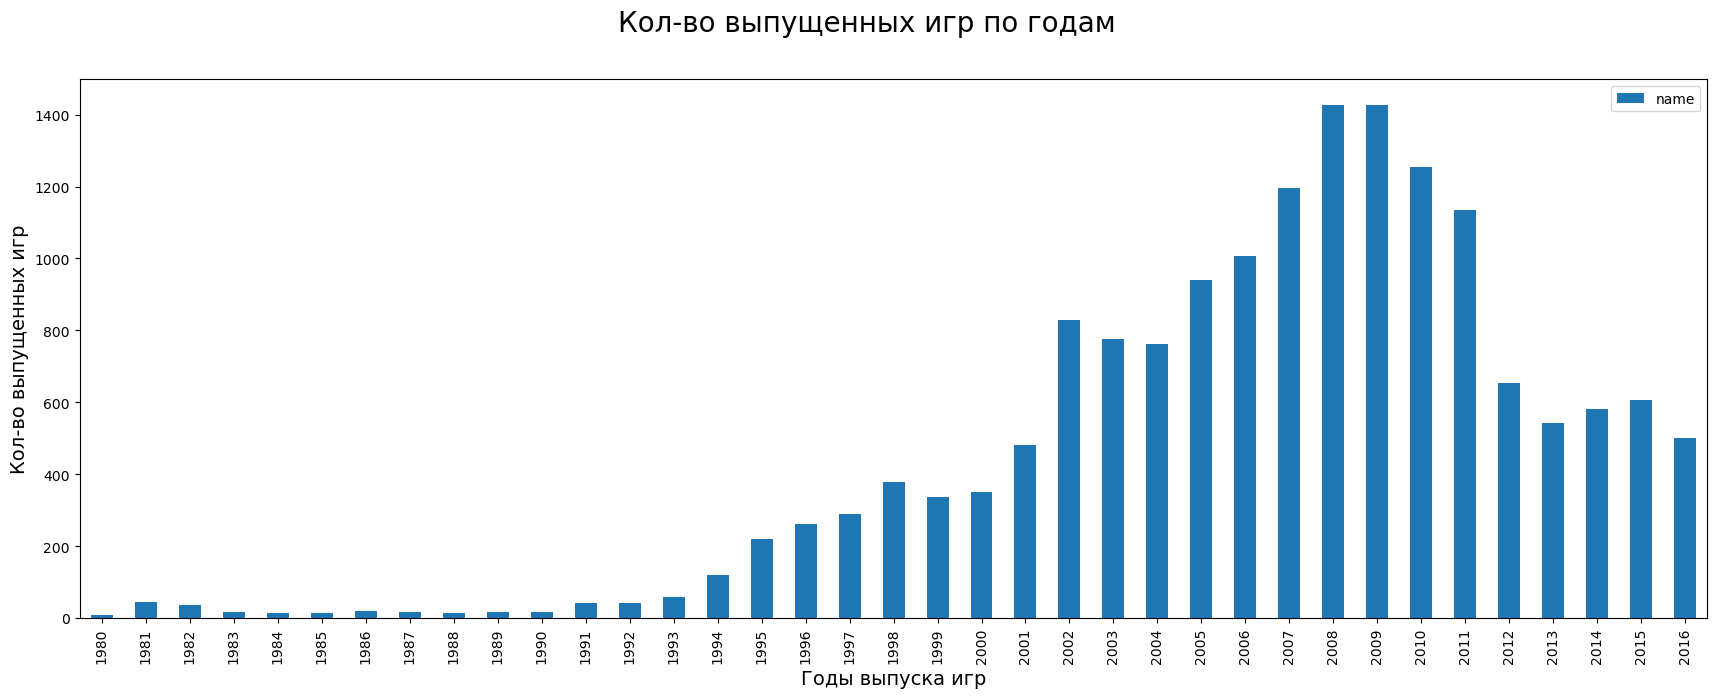

In [21]:
games_in_year = df.pivot_table(
    index='year_of_release', values='name', aggfunc='count').plot(
    style='o-', figsize=(21, 7), kind='bar')
plt.suptitle('Кол-во выпущенных игр по годам', size=20)
plt.xlabel('Годы выпуска игр',size=14)
plt.ylabel('Кол-во выпущенных игр',size=14)
plt.show()

Из графика видно, что до 1995 года объем выпуска игр достаточно низкий, видимо это связано со недостаточным уровнем развития компьютерной технки. Поэтому данные c 1980 по 1994 год включительно однозначно не представляют интереса для анализа. После 2011 года наблюдается очевидное снижение количества выпуска игр. Вероятнее всего, это связано с осторожностью компаний-разработчиков, в связи с активной экспансией сегмента мобильных игр.

### 3.2 Изменение продаж по платформам

Для начала определим платформы с наибольшими продажами. Сформируем сводную таблицу **quantity_by_platform** и отсортируем по суммарному объему проданных игр по каждой платформе в порядке убывания:

In [22]:
quantity_by_platform = pd.pivot_table(df, index=['platform'], values='sales_quantity', aggfunc='sum')# формируем сводную таблицу
quantity_by_platform.sort_values('sales_quantity',ascending=False)

,sales_quantity
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Согласно таблице, мы можем выделить 6 лидирующих в продажах платформ. Сохраним эти данные в отдельной таблице six_platforms и визуализируем полученные данные:

,sales_quantity
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


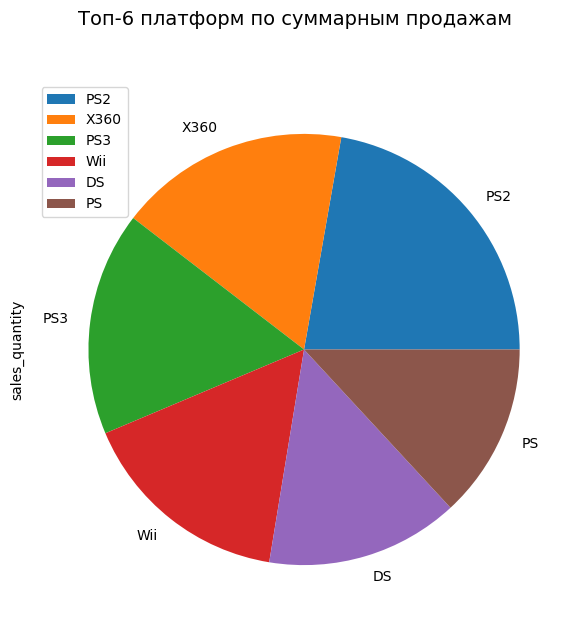

In [23]:
six_platforms = quantity_by_platform.sort_values('sales_quantity',ascending=False).head(6)  # отбираем 6 платформ - лидеров
display(six_platforms)
six_platforms.plot(y='sales_quantity', kind='pie', figsize=(7, 7)) # визуализируем полученные данные
plt.suptitle('Топ-6 платформ по суммарным продажам', size=14)
plt.show()

Теперь посмотрим распределение по годам, формируя сводную таблицу **six_platform_quantity**:

In [24]:
six_platforms_quantity = df.query('platform in (@six_platforms.index)').pivot_table(
    index='year_of_release', columns='platform', values='sales_quantity', aggfunc='sum')
six_platforms_quantity

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


И визуализируем результат:

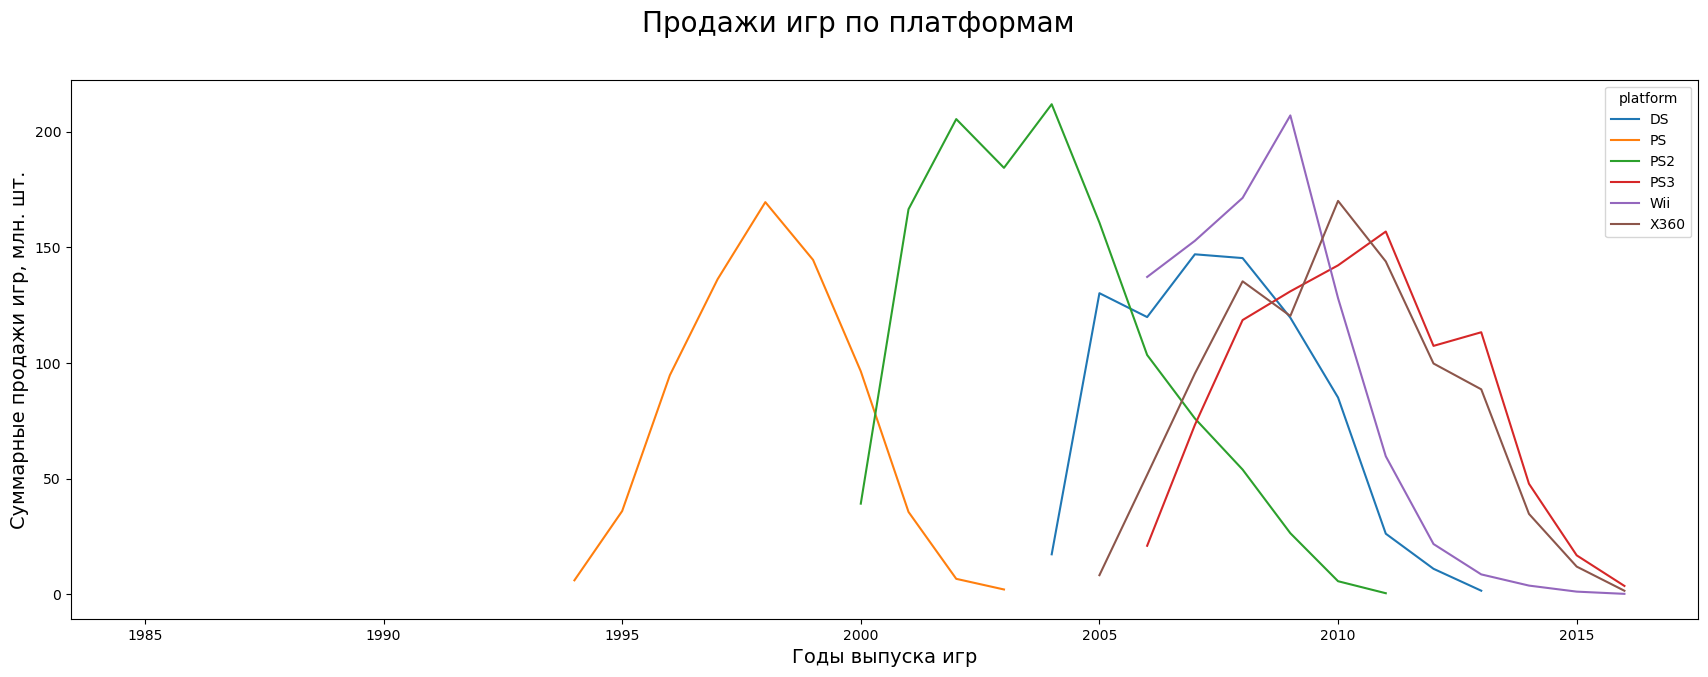

In [25]:
six_platforms_quantity.plot(figsize=(21, 7))
plt.suptitle('Продажи игр по платформам', size=20)
plt.xlabel('Годы выпуска игр',size=14)
plt.ylabel('Суммарные продажи игр, млн. шт.',size=14)
plt.show()

Согласно представленным данным, срок жизни платформы составляет около 11 лет. При этом мы можем наблюдать на графике, что с каждым годом  все чаще появляются новые платформы, а их жизненный цикл имеет тенденцию к сокращению.

### 3.3 Определение актуального периода для построения прогнозов

С учетом выявленной тенденции, нет смысла брать большой диапазон дат в качестве актуальных данных, поскольку они будут нерепрезентативными. Принимая во внимание жизненный цикл платформ, а также возможность неполных данных за 2016 год (по условиям проекта, выборка произведена в декабре и планирование осуществляется тоже в декабре), актуальным периодом следует считать интервал в 3 года, с 2013 по 2015гг. включительно. При этом платформы, переживающие спад, будут компенсировать растущие платформы, и выручка будет стремиться к максимальной величине.    
Отфильтруем данные методом `df.loc` и создадим таблицу с актуальными данными **curent_df**. 

In [26]:
curent_df = df.loc[((df['year_of_release'] > 2012) & (df['year_of_release'] < 2016))]  # актуализируем период данных
curent_df.describe()  # контролируем результат

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_quantity
count,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000
mean,2014.035817,0.226909,0.197002,0.070173,0.060942,30.867129,3.068053,0.555026
std,0.814528,0.602921,0.547053,0.255457,0.180693,37.107650,3.952273,1.344502
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,-1.000000,3.600000,0.140000
75%,2015.000000,0.185000,0.155000,0.060000,0.050000,72.000000,7.100000,0.480000
max,2015.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


Минимальное значение **year_of_release** - 2013, максимальное  - 2015, следовательно данные актуализированы. Переходим к следующему подразделу.

### 3.4 Выбор потенциально прибыльных платформ

Используя актуальные данные, определим платформы с наибольшими продажами. Сформируем сводную таблицу **quantity_by_platform_cur** и отсортируем по суммарному объему проданных игр по каждой платформе в порядке убывания:

In [27]:
quantity_by_platform_cur = pd.pivot_table(
    curent_df, index=['platform'], values='sales_quantity', aggfunc='sum')# формируем сводную таблицу
quantity_by_platform_cur = quantity_by_platform_cur.sort_values('sales_quantity',ascending=False)  # сортируем

Расчитаем долю продаж по каждой платформе и добавим соответствующий столбец с данными **share_of_sales**:

In [28]:
quantity_by_platform_cur['share_of_sales'] = (quantity_by_platform_cur['sales_quantity']
                                              / quantity_by_platform_cur['sales_quantity'].sum())

Затем рассчитаем долю продаж нарастающим итогом с помощью метода кумулятивной суммы и внесем данные в соответствующий столбец **cum_share**:

In [29]:
quantity_by_platform_cur['cum_share'] = quantity_by_platform_cur['share_of_sales'].cumsum()

Как известно, при проведении ABC анализа, пороговое значение для группы "A" обычно составляет 80% от общего объема. Воспользуемся методом `np.where()` для заполнения значениями нового столбца **group_a** (единица укажет на принадлежность к данной группе, а ноль - нет). Далее, преобразуем данные нового столбца в целочисленное значение, и методом `df.loc` отфильтруем платформы, принадлежащие к группе "А", т.е. самые перспективные.

In [30]:
quantity_by_platform_cur['group_a'] = np.where(quantity_by_platform_cur['cum_share'] < 0.8, '1', '0')  # заполняем принадлежность к группе А
quantity_by_platform_cur['group_a'] = pd.to_numeric(quantity_by_platform_cur['group_a'])  # преобразуем тип данных
quantity_by_platform_cur = quantity_by_platform_cur.loc[quantity_by_platform_cur['group_a'] == 1]  # фильтруем значения
quantity_by_platform_cur  # контролируем результат

,sales_quantity,share_of_sales,cum_share,group_a
platform,,,,
PS4,244.89,0.254895,0.254895,1
PS3,177.83,0.185095,0.439990,1
X360,135.28,0.140807,0.580796,1
XOne,133.17,0.138610,0.719407,1


Посмотрим распределение по годам, формируя сводную таблицу **top_platforms_quantity**:

In [31]:
top_platforms_quantity = curent_df.query(
    'platform in (@quantity_by_platform_cur.index)').pivot_table(
    index='year_of_release', columns='platform', values='sales_quantity', aggfunc='sum')
top_platforms_quantity

platform,PS3,PS4,X360,XOne
year_of_release,,,,
2013,113.25,25.99,88.58,18.96
2014,47.76,100.00,34.74,54.07
2015,16.82,118.90,11.96,60.14


И визуализируем ее:

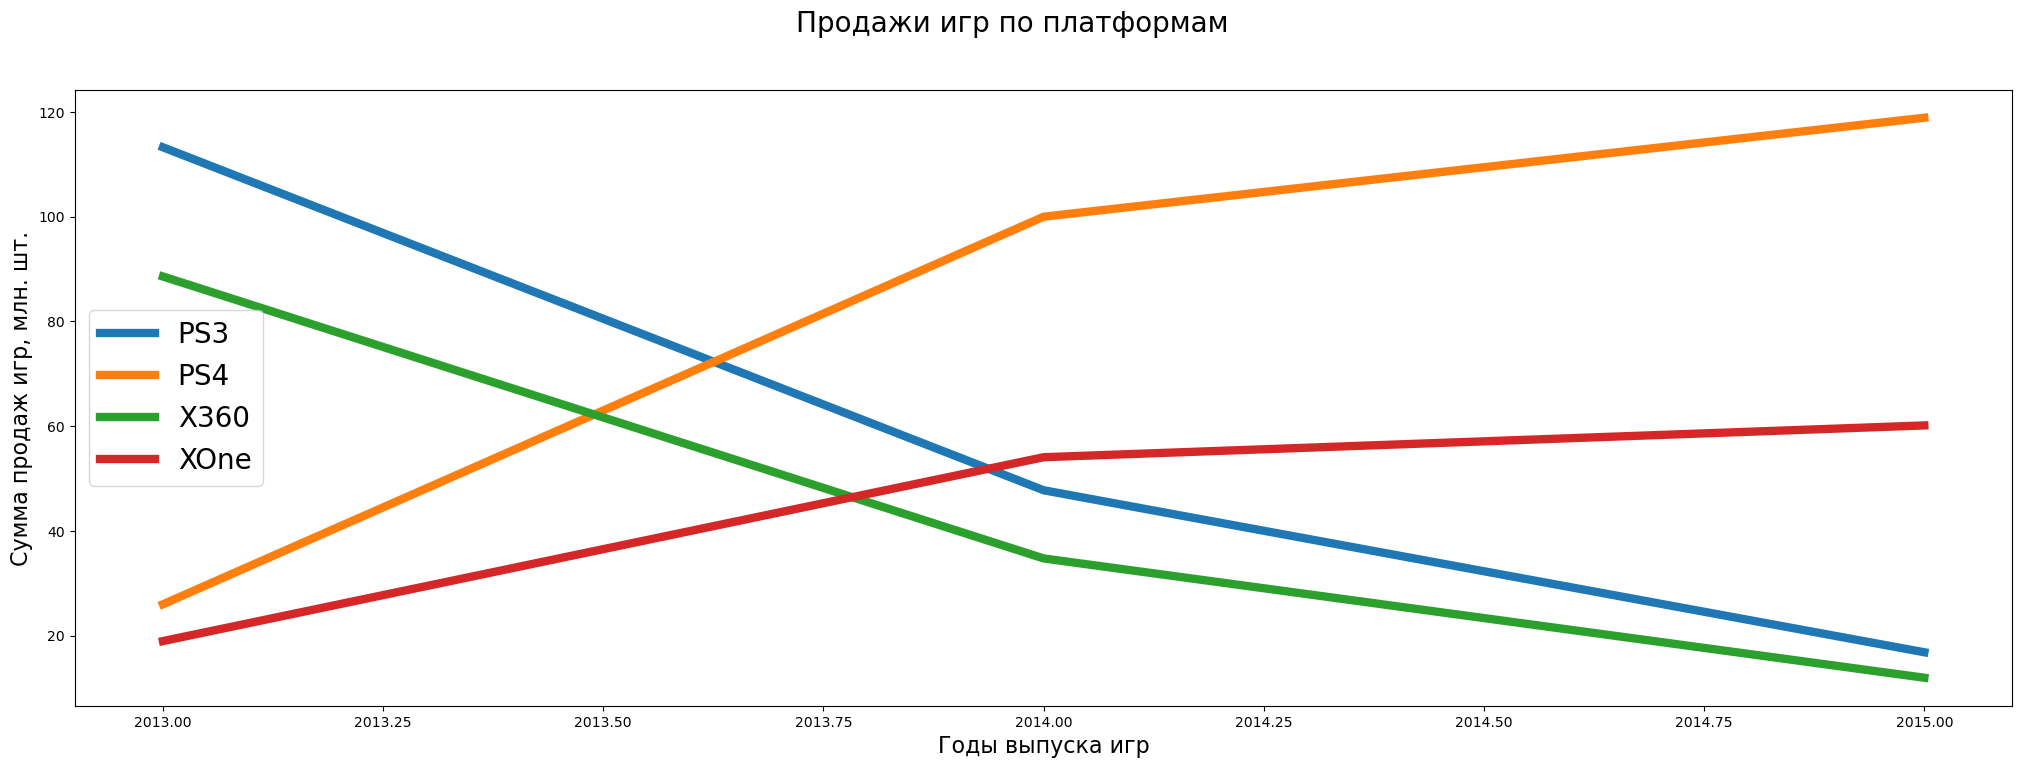

In [32]:
top_platforms_quantity.plot(figsize=(25, 8), linewidth = 6)
plt.suptitle('Продажи игр по платформам', size=20)
plt.xlabel('Годы выпуска игр',size=16)
plt.ylabel('Сумма продаж игр, млн. шт.',size=16)
plt.legend(fontsize=20)
plt.show()

На основании данного графика, можно утверждать, что наиболее перспективными и растущими являются платформы PS4, остальные находятся в стадии медленнго спада. Хотя, вполне возможно, что технический прогресс может дать второе дыхание играм на персональных компьютерах.

###  3.5 Построение диаграммы размаха на основе глобальных продаж игр, в разбивке по платформам

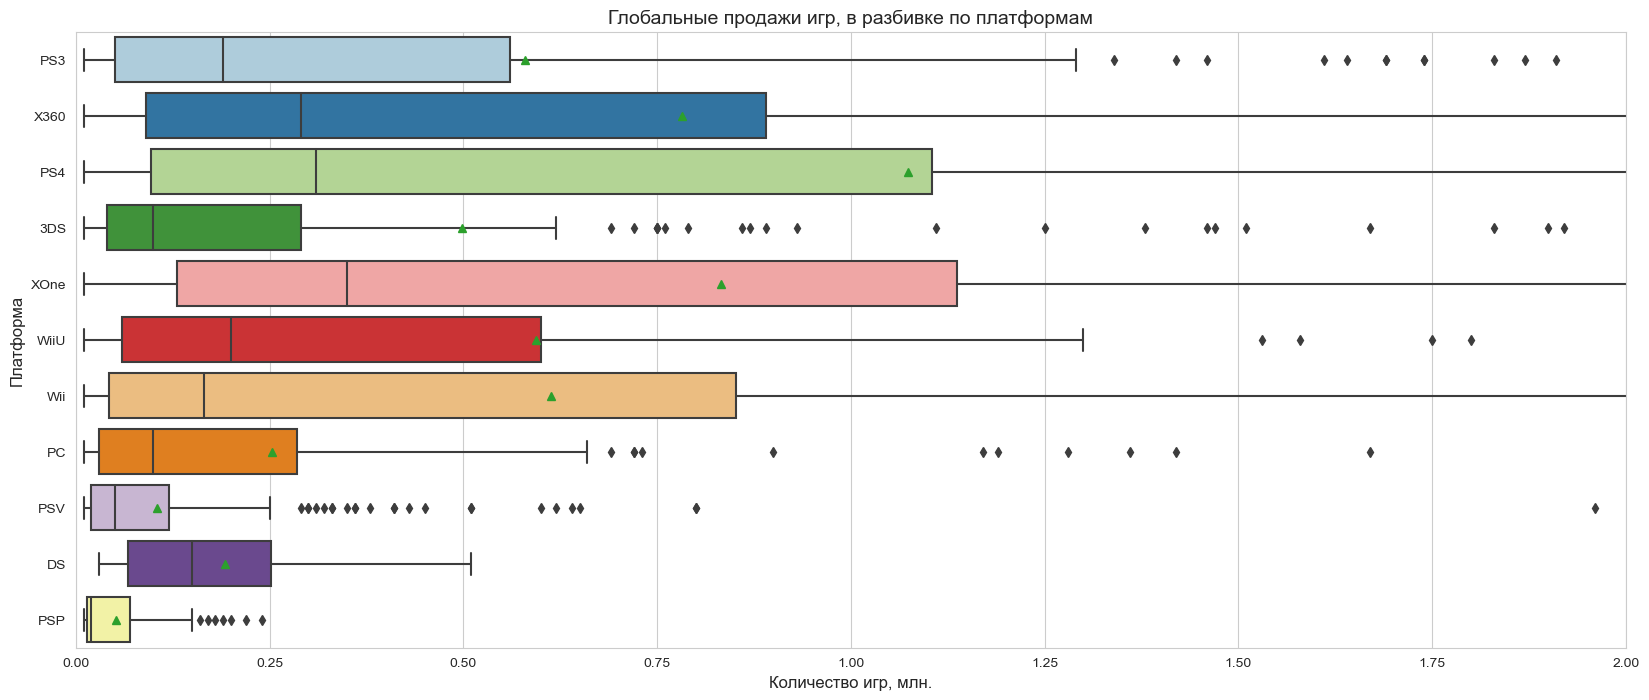

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sns.boxplot(data=curent_df, orient='h', y='platform', x='sales_quantity', showmeans=True, palette="Paired")
plt.xlim(0, 2)
plt.title('Глобальные продажи игр, в разбивке по платформам', size=14)
plt.ylabel('Платформа', fontsize=12)
plt.xlabel('Количество игр, млн.', fontsize=12)
plt.show()

Среди наиболее популярных платформ наблюдаются выбросы. Очевидно, что отдельные игры на популярных платформмах имеют больший успех и продаются гораздо большими тиражами:

### 3.6 Влияние отзывов критиков и пользователей на продажи внутри популярной платформы (PS4)

Рассмотрим на примере самой популярной платформы (PS4) влияние отзывов критиков и пользователей на продажи. Для начала отфильтруем данные по платформе pc4 и запишем их в отдельную переменную **pc4_slice**. Затем построим график heatmap с указанием значений корреляции и построим диаграммы pairplot:

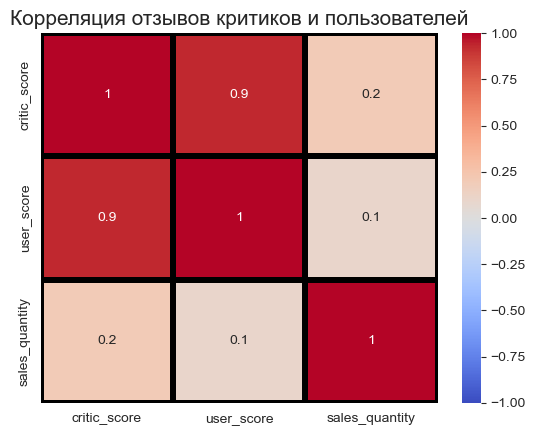

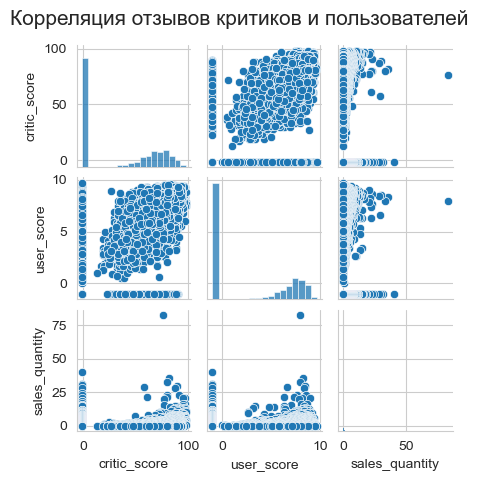

In [34]:
pc4_slice = curent_df.query('platform == "PS4"')  # фильтруем данные

sns.heatmap(pc4_slice[['critic_score', 'user_score', 'sales_quantity']].corr(),
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', fmt='.1g')  # heatmap
plt.title('Корреляция отзывов критиков и пользователей', fontsize = 15) 

sns.pairplot(df, vars=['critic_score', 'user_score', 'sales_quantity'], height=1.5)  # строим диаграммы pairplot
plt.suptitle('Корреляция отзывов критиков и пользователей', size=15, y=1.05)
plt.show()  # выводим результат

Коэффициент корреляции между отзывами и количеством продаж находтся на уровне 0 (+-0,25) поэтому мы можем утверждать о ее отсутствии. Есть корреляция (на уровне 0,9) между отзывами пользователей и критиков, что вполне ожидаемо, поскольку критики игр чаще всего являютя активными пользователями игр.  
На диаграммах рассеяния мы можем наблюдать высокие оценки критиков и пользователей как для игр с высокими продажами, так и для игр с низкими продажами.
Очевидно, что на объемы продаж влияют другие факторы.

### 3.7 Соотнесение выводов о корреляции отзывов с продажами на других платформах

Для соотнесения выводов о корреляции отзывов с продажами на других платформах, создадим список перспективных платформ и выведем коэффициенты корреляции по ним с помощью функции:

In [35]:
promising_platforms = list(quantity_by_platform_cur.index) # создаем список перспективных платформ

def corr_calc (data):  # создаем функцию по расчету корреляции и выводу результата
    for platform in promising_platforms:
        fx = data.query('platform == @platform')
        print('Коэффициент корреляции оценок критиков и продаж игр на платформе',
              platform, ':      {}'.format(round((fx.critic_score.corr(fx.sales_quantity)), 2)))
        print('Коэффициент корреляции оценок пользователей и продаж игр на платформе',
              platform, ': {}'.format(round((fx.user_score.corr(fx.sales_quantity)), 2)))
        print()
        
corr_calc (curent_df)  # запускаем функцию

Коэффициент корреляции оценок критиков и продаж игр на платформе PS4 :      0.2
Коэффициент корреляции оценок пользователей и продаж игр на платформе PS4 : 0.1

Коэффициент корреляции оценок критиков и продаж игр на платформе PS3 :      0.26
Коэффициент корреляции оценок пользователей и продаж игр на платформе PS3 : 0.19

Коэффициент корреляции оценок критиков и продаж игр на платформе X360 :      0.23
Коэффициент корреляции оценок пользователей и продаж игр на платформе X360 : 0.05

Коэффициент корреляции оценок критиков и продаж игр на платформе XOne :      0.29
Коэффициент корреляции оценок пользователей и продаж игр на платформе XOne : 0.15



На других платформах корреляция между отзывами и продажами также близка к нулю. Отмечается очень слабая корреляция между оценками критиков и продаж игр на платформах PS3 и XOne (на уровне 0,26 и 0,29 соответственно)

### 3.8 Распределение игр по жанрам

Рассмотрим общее распределение игр по жанрам с помощью сводной таблицы. И выведем диаграмму по количеству игр в каждом жанре:

,count
genre,
Action,588
Role-Playing,238
Adventure,189
Sports,166
Shooter,140
Misc,123
Fighting,64
Racing,61
Platform,59


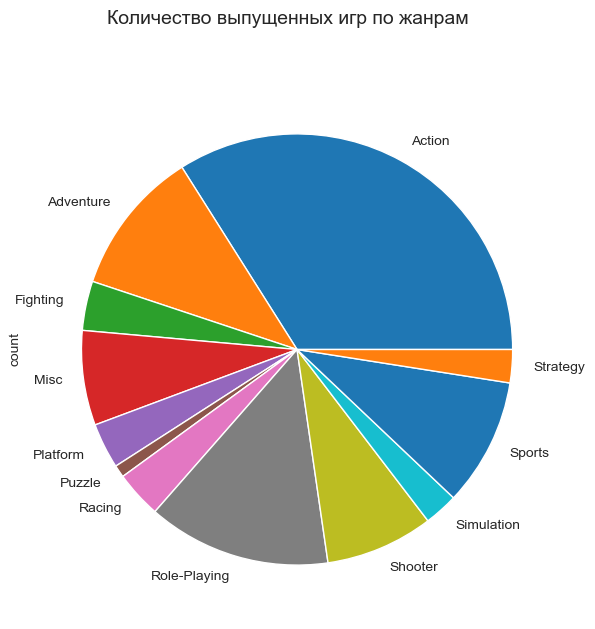

In [36]:
games_by_genre = curent_df.pivot_table(index='genre', values='name', aggfunc='count')  # создаем таблицу
games_by_genre.columns = ['count']
display(games_by_genre.sort_values(by='count', ascending=False)) # выводим ее на экран
games_by_genre.plot(y='count', kind='pie', legend=False, figsize=(7, 7)) # визуализируем полученные данные
plt.suptitle('Количество выпущенных игр по жанрам', size=14)
plt.show()

По кол-ву игр c большим отрывом лидирует жанр Action, за ним следуют еще 5 ведущих жанров: Role-Playing, Advanture, Sports, Shooter и Misc.

Теперь рассмотрим самые прибыльные жанры. Для этого также создадим сводную таблицу, а данные отсортируем по средним продажам игр и выведем для наглядности столбчатую диаграмму:


,mean
genre,
Shooter,1.391143
Sports,0.766024
Platform,0.667797
Racing,0.608197
Role-Playing,0.536597
Action,0.496190
Misc,0.489593
Fighting,0.481875
Simulation,0.451591


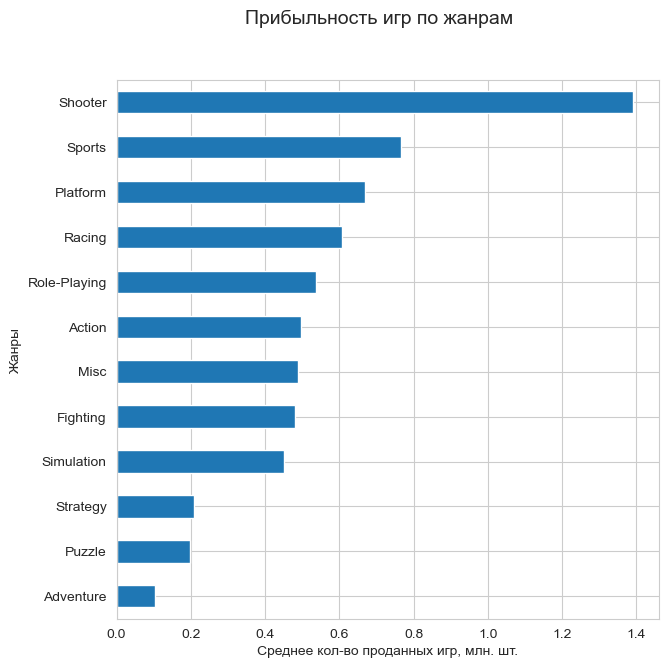

In [37]:
sales_by_genre = curent_df.pivot_table(index='genre', values='sales_quantity', aggfunc='mean')  # создаем таблицу
sales_by_genre.columns = ['mean']
display(sales_by_genre.sort_values(by='mean', ascending=False)) # выводим ее на экран
sales_by_genre.sort_values(by='mean').plot(y='mean', kind='barh', legend=False, figsize=(7, 7)) # визуализируем данные
plt.suptitle('Прибыльность игр по жанрам', size=14)
plt.xlabel('Среднее кол-во проданных игр, млн. шт.',size=10)
plt.ylabel('Жанры',size=10)
plt.show()

По прибыльности лидирует жанр Shooter, за ним следуют жанры Sports, Platform, Racing и Role-Playing. А вот жанр Advanture, несмотря на достаточно широкую линейку игр, по показателю прибыльности находится в самом низу списка.

### 3.9 Вывод

На этапе исследовательского анализа данных был проанализирован выпуск игр по годам, изменение продаж по платформам и была обнаружена тенденция к снижению кол-ва предложений на рынке PC и игровых консолей. На основании графиков был определен актуальный период для построения прогнозов, и в сочетании с ABC анализом, определены потенциально выгодные платформы для планирования будущих продаж. Это PS4, PS3, X360 и XOne. Сюда же можно добавить теряющую популярность, но пока не устаревающую платформу PC. 

На основании построения диаграммы размаха установлено, что в игровой индустрии часто можно наблюдать выбросы среди показателей продаж в наиболее популярных платформах.  
На основе изучения корреляции оценок критиков, пользователей и объемов продаж, установлено отсутствие какого-либо значимого влияния отзывов на продажи для всех популярных игровых платформ. 

Среди наиболее популярных и прибыльных игровых жанров можно выделить четыре: Action, Shooter, Role_Playing и Sports. При этом жанр Action лидирует с большим отрывом по количеству игр, а жанр Shooter по прибыльности. Жанр Advanture представлен широкой линейкой игр, при этом имеет слабый показатель продаж, что может указывать на угасание его популярности.

## 4 Составление портрета пользователя каждого региона (NA, EU, JP)

### 4.1 Самые популярные платформы (топ-5) для пользователя каждого региона

Для начала сформируем сводные таблицы по регионам:

In [38]:
na_platforms = curent_df.pivot_table(index='platform', values='na_sales', aggfunc='sum')  # сводная таблица по региону na
na_platforms = na_platforms.sort_values('na_sales',ascending=False).head()

eu_platforms = curent_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')  # сводная таблица по региону eu
eu_platforms = eu_platforms.sort_values('eu_sales',ascending=False).head()

jp_platforms = curent_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')  # сводная таблица по региону jp
jp_platforms = jp_platforms.sort_values('jp_sales',ascending=False).head()

Теперь можно визуализировать данные:

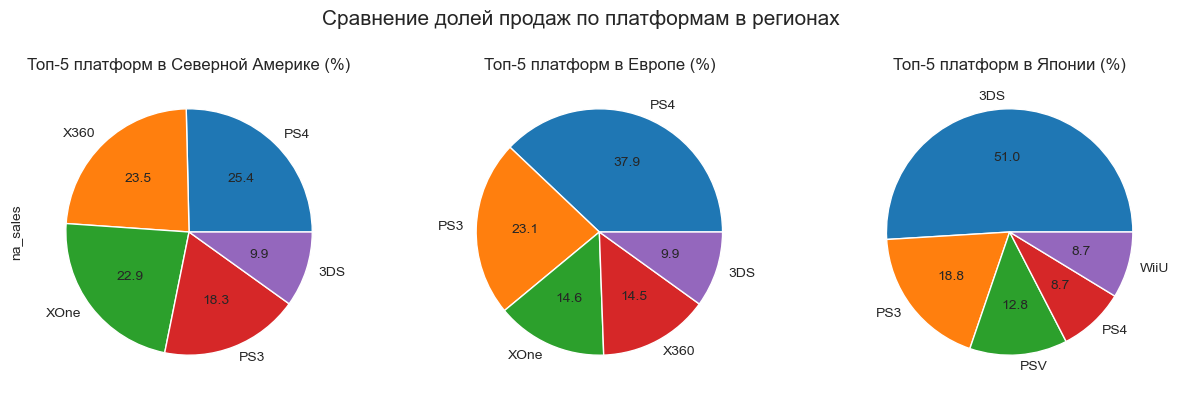

In [39]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 4));
plt.suptitle('Сравнение долей продаж по платформам в регионах', fontsize=15, y=1.05);

na_platforms.plot(kind='pie', autopct='%.1f', legend=False, ax=ax0, subplots=True);
ax0.set(title='Топ-5 платформ в Северной Америке (%)');

eu_platforms.plot(kind='pie', autopct='%.1f', legend=False, ax=ax1, subplots=True);
ax1.set(title='Топ-5 платформ в Европе (%)');

jp_platforms.plot(kind='pie', autopct='%.1f', legend=False, ax=ax2, subplots=True);
ax2.set(title='Топ-5 платформ в Японии (%)');

В Северной Америке и Европе имеется схожее распределение платформ по долям - лидирует PS4, а самая низкая доля у 3DS. В Японии же, напротив, лидирует портативная приставка Nintendo 3DS а PS4 занимает низкую долю наравне с WiiU.

### 4.2 Самые популярные жанры (топ-5) для пользователя каждого региона

Сформируем сводные таблицы по регионам:

In [40]:
na_genres = curent_df.pivot_table(index='genre', values='na_sales', aggfunc='sum')  # сводная таблица по региону na
na_genres = na_genres.sort_values('na_sales',ascending=False).head()

eu_genres = curent_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')  # сводная таблица по региону eu
eu_genres = eu_genres.sort_values('eu_sales',ascending=False).head()

jp_genres = curent_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')  # сводная таблица по региону jp
jp_genres = jp_genres.sort_values('jp_sales',ascending=False).head()

Теперь можно визуализировать данные:

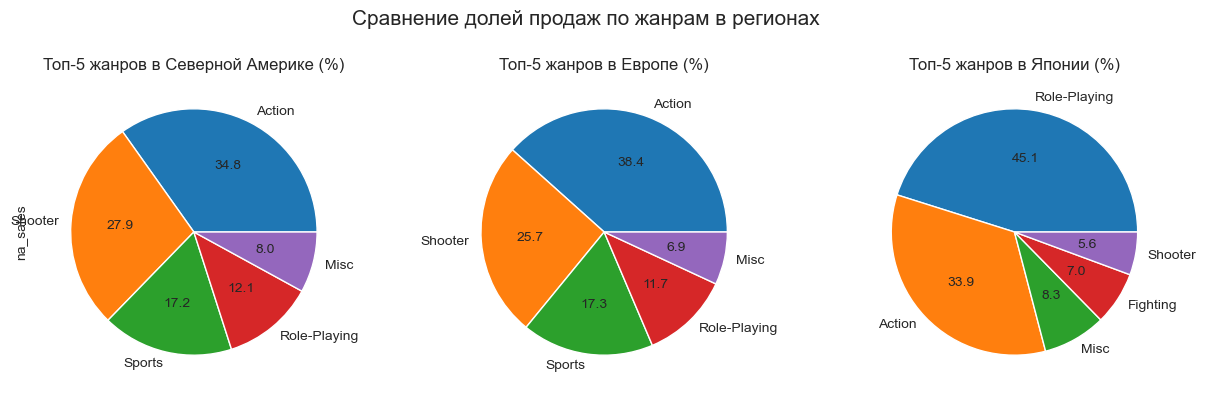

In [41]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 4));
plt.suptitle('Сравнение долей продаж по жанрам в регионах', fontsize=15, y=1.05);

na_genres.plot(kind='pie', autopct='%.1f', legend=False, ax=ax0, subplots=True);
ax0.set(title='Топ-5 жанров в Северной Америке (%)');

eu_genres.plot(kind='pie', autopct='%.1f', legend=False, ax=ax1, subplots=True);
ax1.set(title='Топ-5 жанров в Европе (%)');

jp_genres.plot(kind='pie', autopct='%.1f', legend=False, ax=ax2, subplots=True);
ax2.set(title='Топ-5 жанров в Японии (%)');

Доли по игровым жанрам в Северной Америке и Европе имеют похожие значения. Здесь лидируют Action и Shooter. Рынок Японии также имеет в лидерах жанр Action, но в части остальных жанров имеет свои отличия: здесь первое место закрепилось за Role-Playing, а жанр Shooter занимает среди топ-5 невысокую долю в 5,6% 

### 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

Сформируем сводные таблицы по регионам:

In [42]:
na_rating = curent_df.pivot_table(index='rating', values='na_sales', aggfunc='sum')  # сводная таблица по региону na
na_rating = na_rating.sort_values('na_sales',ascending=False)

eu_rating = curent_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum')  # сводная таблица по региону eu
eu_rating = eu_rating.sort_values('eu_sales',ascending=False)

jp_rating = curent_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum')  # сводная таблица по региону jp
jp_rating = jp_rating.sort_values('jp_sales',ascending=False)

Теперь можно визуализировать данные:

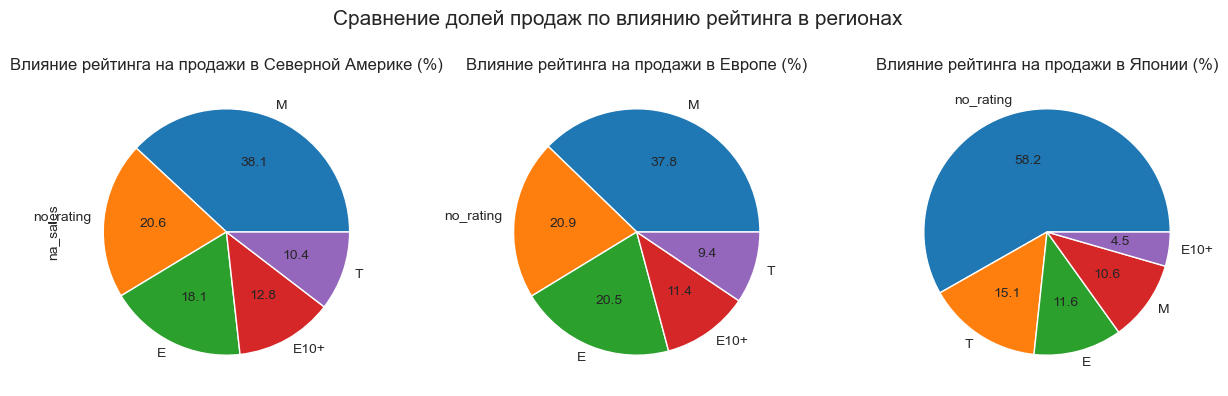

In [43]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 4));
plt.suptitle('Сравнение долей продаж по влиянию рейтинга в регионах', fontsize=15, y=1.05);

na_rating.plot(kind='pie', autopct='%.1f', legend=False, ax=ax0, subplots=True);
ax0.set(title='Влияние рейтинга на продажи в Северной Америке (%)');

eu_rating.plot(kind='pie', autopct='%.1f', legend=False, ax=ax1, subplots=True);
ax1.set(title='Влияние рейтинга на продажи в Европе (%)');

jp_rating.plot(kind='pie', autopct='%.1f', legend=False, ax=ax2, subplots=True);
ax2.set(title='Влияние рейтинга на продажи в Японии (%)');

В Северной Америке и Европе самую большую долю продаж занимают игры с рейтингом «M», что означает «Mature», «Для взрослых». Вероятнее всего это связано с популярностью жанров Action и Shooter, большинству из которых присваивается рейтинг M из-за наличия сцен насилия, жестокости, крови и т.п.  
Влияние рейтинга ESRB на рынок Японии установить сложно, поскольку больше половины данных по продаже игр имеют соответствующе отметки и входят в группу no_rating. Возможно, по причине доминирования своей (японской) национальной системы рейтинга CERO, и объясняется отсутствие значительной части данных по рейтингу ESRB.

### 4.4 Вывод

Для пользователей регионов Северной Америки и Европы характерны схожие предпочтения при выборе игровых платформ и любимых жанров. Среди платформ лидирует PS4, а самая низкая доля у 3DS. Среди игровых жанров наиболее популярны Action и Shooter.  
Для рынка Японии характерно доминирование портативной игровой приставки 3DS и низкая доля PS4 и WiiU. Жанр Action занимает второе место, следуя за жанром Roley-Playing.  
Пользователи Северной Америки и Европы чаще выбирают игры с маркировкой M по версии рейтинга ESRB, а для рынка Японии такие связи установить не возможно по причине недостатка данных.

## 5 Проверка гипотез

**Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Формулируем нулевую гипотезу, исходя из предположения о свойствах генеральной совокупности, которое является логичным и правдоподобным, но требует проверки. Затем формулируем альтернативную гипотезу, как утверждение о свойствах генеральной совокупности, которое принимается в случае, когда нет возможности принять основную гипотезу.  
Поскольку наши данные содержат большое количество пропусков, пороговое значение alpha принимаем на среднем уровне 5%.  
Для проверки гипотез путем сравнения средних значений двух выборок лучше всего подходит T-критерий Стьюдента.

H_0: Средний рейтинг пользователей платформы Xbox One = средний рейтинг пользователей платформы PC  
H_1: Средний рейтинг пользователей платформы Xbox One ≠ средний рейтинг пользователей платформы PC  
alpha = 0.05

In [44]:
xone = curent_df[(curent_df['platform'] == 'XOne') & (curent_df['user_score'] >= 0)]['user_score']
pc = curent_df[(curent_df['platform'] == 'PC') & (curent_df['user_score'] >= 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы показала, что есть вероятность, что средние рейтинги пользователей платформ Xbox One и PC одинаковые.

**Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Аналогичным образом формулируем нулевую и альтернативную гипотезы, пороговое значение alpha также принимаем на уровне 5%, для проверки гипотезы тоже используем T-критерий Стьюдента.

H_0: Средний рейтинг пользователей жанра Action = средний рейтинг пользователей жанра Sports  
H_1: Средний рейтинг пользователей жанра Action ≠ средний рейтинг пользователей жанра Sports  
alpha = 0.05

In [45]:
action = curent_df[(curent_df['genre'] == 'Action') & (curent_df['user_score'] >= 0)]['user_score']
sports = curent_df[(curent_df['genre'] == 'Sports') & (curent_df['user_score'] >= 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.5076737062533423e-19
Отвергаем нулевую гипотезу


Проверка гипотезы показала, что нулевая гипотеза может быть отвергнута и вероятно, что средние рейтинги пользователей жанров Action и Sports различаются.

## 6 Общий вывод

В рамках данного проекта устранены проблемы в данных, отработан принцип работы с данными для изучения закономерностей, определяющих коммерческую успешность игр, включая исследование выпуска игр по годам, изменение продаж по платформам, определение актуального периода, выбор потенциально прибыльных платформ, исследование влияния отзывов критиков и пользователей на продажи, определение популярных жанров, изучение спроса и влияние рейтинга ESRB по регионам продаж. В дополнение, были сформулированы и проверены две гипотезы.
Такой комплексный подход позволяет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на будущие периоды.  

**Выявлено, что коммерческую успешность продукта необходимо оценивать исходя из предполагаемого региона сбыта:**

*Для успешной экспансии на рынки Северной Америки и Европы, окажут положительное влияние следующие факторы:*
- выпуск игры для одной из популярных платформ: PS4, X360, XOne, PS3 и 3DS;  
- выпуск игры в жанре Action, Shooter, Sports, Role-Playing и Misc;  
- присвоенный игре рейтинг М по версии ESRB  

*Для успеха на рынке Японии будут полезны следующие факторы:*  
- выпуск игры для одной из популярных платформ: 3DS, PS3 и PSV, PS4 и WiiU;
- выпуск игры в жанре Action, Role-Playing, Misc, Fighting и Shooter

Планировать рекламную компанию необходимо также с акцентом на выделенные факторы, и обязательно с учетом выявленных региональных особенностей.
